In [717]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import matplotlib.cm as cm
import math
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from numpy import isnan
import bootstrapped.bootstrap as bs
import random
import bootstrapped.stats_functions as bs_stats
import time
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
import geopandas
import plotly.graph_objects as go
import plotly.figure_factory as ff
import time
from datetime import datetime, date, time, timedelta
from matplotlib import style
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(0)
style.use('ggplot')
from sklearn.svm import NuSVC
import seaborn as sns
from sklearn.svm import LinearSVC
from sklearn.datasets import make_classification
import warnings
from statistics import mean
warnings.filterwarnings('ignore')

In [760]:
def generate_words(data):
    words = []
    # data(str): csv on show info
        # eg: Bachelor_S22_2018.csv

    df = pd.read_csv(r"/Users/lindseytam/Desktop/team-shows/show_info/"+data) 

    for i in range(len(df["twitter_handle"])):
      
        words.append(df["twitter_handle"][i])
    
    return words

def hidden_key(og_data, new_data, winner):
    #this function lets us know the values for everyone
    #data (str): Bachelor_2018.csv
    contestants = generate_words(og_data) 
    #df = pd.read_csv(r"/Users/lindseytam/Desktop/team-shows/cleaned_data/"+og_data) 
    #df = df.drop(columns=['Unnamed: 0'])
    
    contestant_tweetTotal = []
    winner_data = []
    #contestant_data = []
    for contestant in contestants:
        
        #contestant_tweetTotal.append([contestant, contestant_data["polarity"].mean(), len(contestant_data)])
        if contestant == winner:
            contestant_data = new_data[new_data['text'].str.contains(contestant)]
            if isnan(contestant_data["polarity"].mean()):
                contestant_polarity = 0
            else:
                contestant_polarity = contestant_data["polarity"].mean()
            winner_data.append([contestant_polarity, len(contestant_data)])
        return winner_data
        
def key(og_data, new_data):
    #this function lets us know the values for everyone
    #og_data (str): Bachelor_2018.csv
    contestants = generate_words(og_data) 
    #df = pd.read_csv(r"/Users/lindseytam/Desktop/team-shows/cleaned_data/"+data) 
    #df = df.drop(columns=['Unnamed: 0'])
    
    contestant_tweetTotal = []
    for contestant in contestants:
        contestant_data = new_data[new_data['text'].str.contains(contestant)]
        if isnan(contestant_data["polarity"].mean()):
            contestant_polarity = 0
        else:
            contestant_polarity = contestant_data["polarity"].mean()
        contestant_tweetTotal.append([contestant_polarity, len(contestant_data)])
        
    return contestant_tweetTotal

def clean_tweets(data):
    # just making sure all dates are in datetime
    data = pd.read_csv(r"/Users/lindseytam/Desktop/team-shows/cleaned_data/"+data+".csv") 
    
    data["date"] = pd.to_datetime(df["date"]).dt.date
    data = data.dropna()
    return data

def make_data(data, season, winner, samples):
    # data(str): "Bachelor_2018.csv"
    # season(int): 22
    # winner(str): "thebkoof"
    # samples(int): how many times to bootstrap
    
    open_data = pd.read_csv(r"/Users/lindseytam/Desktop/team-shows/cleaned_data/"+data) 
    
    for i in range(samples):
        open_data = open_data.sample(n=len(open_data),replace=True) #bootstrap the data
        # should n be dependent on length of data??
        # what if winner is not included in bootstrap
        winner_info = hidden_key(data, open_data, winner)
        new_data = key(data, open_data)
        add_empty = 30 - len(new_data)
        for i in range(add_empty):
            new_data.append([0,0])
        np.random.shuffle(new_data)
        flat_list = [item for items in new_data for item in items]
        if not winner_info:
            break
        winner_id = flat_list.index(winner_info[0][0])
        winner_id = winner_id/2
        winner_id = round(winner_id)
        flat_list.append(season) 
        flat_list.append(winner_id)
        globaldata.loc[len(globaldata)] = flat_list
        
    return globaldata
    
def generate_data(samples):
    # samples(int): how many times to bs
    #globaldata = initialize_globaldf()
    
    data = make_data("Bachelor_2018.csv", 22, "thebkoof", samples)
    data1 = make_data("Bachelor_2019.csv", 23, "CassieRandolph", samples)
    data3 = make_data("Bachelorette_2018.csv", 14, "", samples)
    data4 = make_data("Bachelorette_2019.csv", 15, "WyattJed", samples)
    
    inputs = globaldata.drop(columns=['n_season', 'id_winner'])
    outputs = globaldata[["id_winner"]]
                    
    X_train, X_test, Y_train, Y_test = train_test_split(inputs, outputs, test_size=0.2)
    return ((X_train, Y_train), (X_test, Y_test))

def initialize_globaldf():
    colname = []
    for i in range(30):
        colname.append("contestant_" + str(i) + "_avg_sentiment")
        colname.append("contestant_" + str(i) + "_total_tweets")
    colname.append("n_season")
    colname.append("id_winner")
    globaldata = pd.DataFrame(columns=colname)
    
    return globaldata

In [658]:
# ignore this section

start = 20180101 #show airs
end = 20180313


df = pd.read_csv(r"/Users/lindseytam/Desktop/team-shows/cleaned_data/Bachelor_2018.csv") 
df = df.drop(columns=['Unnamed: 0'])
#y = time.strptime(df["date"][0], "%a %b %d %H:%M:%S +0000 %Y")
#z = time.strptime(df["date"][0], "%a %b %d %H:%M:%S +0000 %Y")

df = clean_tweets("Bachelor_2018")


c = (pd.to_datetime(str(start), format='%Y%m%d') + timedelta(days=7))

# Initialize global dataframe

In [655]:
colname = []
for i in range(30):
    colname.append("contestant_" + str(i) + "_avg_sentiment")
    colname.append("contestant_" + str(i) + "_total_tweets")
colname.append("n_season")
colname.append("id_winner")

globaldata = pd.DataFrame(columns=colname)

# Generate Dataset

In [822]:
# quick test on Bachelorette_2019

contestants = generate_words("Bachelorette_2019.csv") 
df = pd.read_csv(r"/Users/lindseytam/Desktop/team-shows/cleaned_data/Bachelorette_2019.csv") 
df = df.drop(columns=['Unnamed: 0'])

contestant_tweetTotal = []
for contestant in contestants:
    contestant_data = df[df['text'].str.contains(contestant)]
    if isnan(contestant_data["polarity"].mean()):
        contestant_polarity = 0
    else:
        contestant_polarity = contestant_data["polarity"].mean()
    contestant_tweetTotal.append([contestant, contestant_polarity, len(contestant_data)])
#contestant_tweetTotal       

In [823]:
og_data = ["Bachelor_2018.csv", "Bachelorette_2019.csv", "Bachelorette_2018.csv", "Bachelorette_2019.csv"]
season = [22, 23, 14, 15]
winner = ["thebkoof", "CassieRandolph", "", "WyattJed"]

#data = make_data("Bachelor_2019.csv", 23, "CassieRandolph", 10)

# Classification Time

In [820]:
def graph_data(n, output_name, graph_title):
    
    # n(int): max value of data
    # output_name(str): name of output 
    # graph_title(str)
    
    ns = [n for n in range(100,n,100)]
    d=60
    c=30

    scores={ 
        'nb_ave':[],
        'nb_std':[], 
        'lda_ave':[], 
        'lda_std':[], 
        'lr_ave':[], 
        'lr_std':[],
        'lrcv_ave':[], 
        'lrcv_std':[],
        'svc_ave':[],
        'svc_std':[], 
        'lrcv_ave':[], 
        'lrcv_std':[], 
        'sgd_ave':[], 
        'sgd_std':[],
    }

    for n in ns:

        scores_itr={
        'nb':[], 
        'lda': [], 
        'lr':[],
        'svc':[],  
        'sgd':[],
        'lrcv':[]
        }

        for trial in range(5):
            globaldata_x = globaldata.sample(n)
            inputs = globaldata_x.drop(columns=['n_season', 'id_winner'])
            outputs = globaldata_x[["id_winner"]]

            X_train, X_test, Y_train, Y_test = train_test_split(inputs, outputs, test_size=0.2)

            # train a naive bayes model
            nb = GaussianNB()
            nb.fit(X_train,Y_train) 
            scores_itr['nb'].append(nb.score(X_test,Y_test))

            # train lda
            lda = LinearDiscriminantAnalysis() 
            lda.fit(X_train,Y_train) 
            scores_itr['lda'].append(lda.score(X_test,Y_test))

            # train lr
            lr = LogisticRegression() 
            lr.fit(X_train,Y_train) 
            scores_itr['lr'].append(lr.score(X_test,Y_test))

            #train sgd
            sgd = linear_model.SGDClassifier() 
            sgd.fit(X_train,Y_train) 
            scores_itr['sgd'].append(sgd.score(X_test,Y_test))

            #train svc
            svc = LinearSVC()
            svc.fit(X_train,Y_train) 
            scores_itr['svc'].append(svc.score(X_test,Y_test))

        # record the mean and standard deviations of each experiment
        scores['nb_ave'].append(np.mean(scores_itr['nb'])) 
        scores['nb_std'].append(np.std(scores_itr['nb']))

        scores['lda_ave'].append(np.mean(scores_itr['lda'])) 
        scores['lda_std'].append(np.std(scores_itr['lda']))

        scores['lr_ave'].append(np.mean(scores_itr['lr'])) 
        scores['lr_std'].append(np.std(scores_itr['lr']))

        scores['svc_ave'].append(np.mean(scores_itr['svc'])) 
        scores['svc_std'].append(np.std(scores_itr['svc']))

        scores['sgd_ave'].append(np.mean(scores_itr['sgd'])) 
        scores['sgd_std'].append(np.std(scores_itr['sgd']))


    # plot the results of each experiment
    plt.figure(figsize=(30,20))
    plt.errorbar(ns, scores['nb_ave'], yerr=scores['nb_std'], label='Naive Bayes')
    plt.errorbar(ns, scores['lda_ave'], yerr=scores['lda_std'], label='Linear Discriminant Analysis')
    plt.errorbar(ns, scores['lr_ave'], yerr=scores['lr_std'], label='Logistic Regression' )
    plt.errorbar(ns, scores['svc_ave'], yerr=scores['svc_std'], label='Linear Support Vector Classification')
    plt.errorbar(ns, scores['sgd_ave'], yerr=scores['sgd_std'], label='Stochastic Gradient Descent Classifier' )
    plt.xticks(ns, fontsize=25, rotation=45) 
    plt.yticks(fontsize=25) 
    plt.title(graph_title, fontsize = 50) 
    plt.xlabel('Sample Size', fontsize=30) 
    plt.ylabel('Classification Accuracy', fontsize=30) 
    plt.legend(loc='upper center', bbox_to_anchor=(1.25, .7), fontsize=30) 
    plt.savefig("/Users/lindseytam/Desktop/team-shows/Shiny/www/prediction_"+output_name+".png", bbox_inches='tight')
    plt.show()

### Sample size (n) versus Accuracy for 3 Seasons

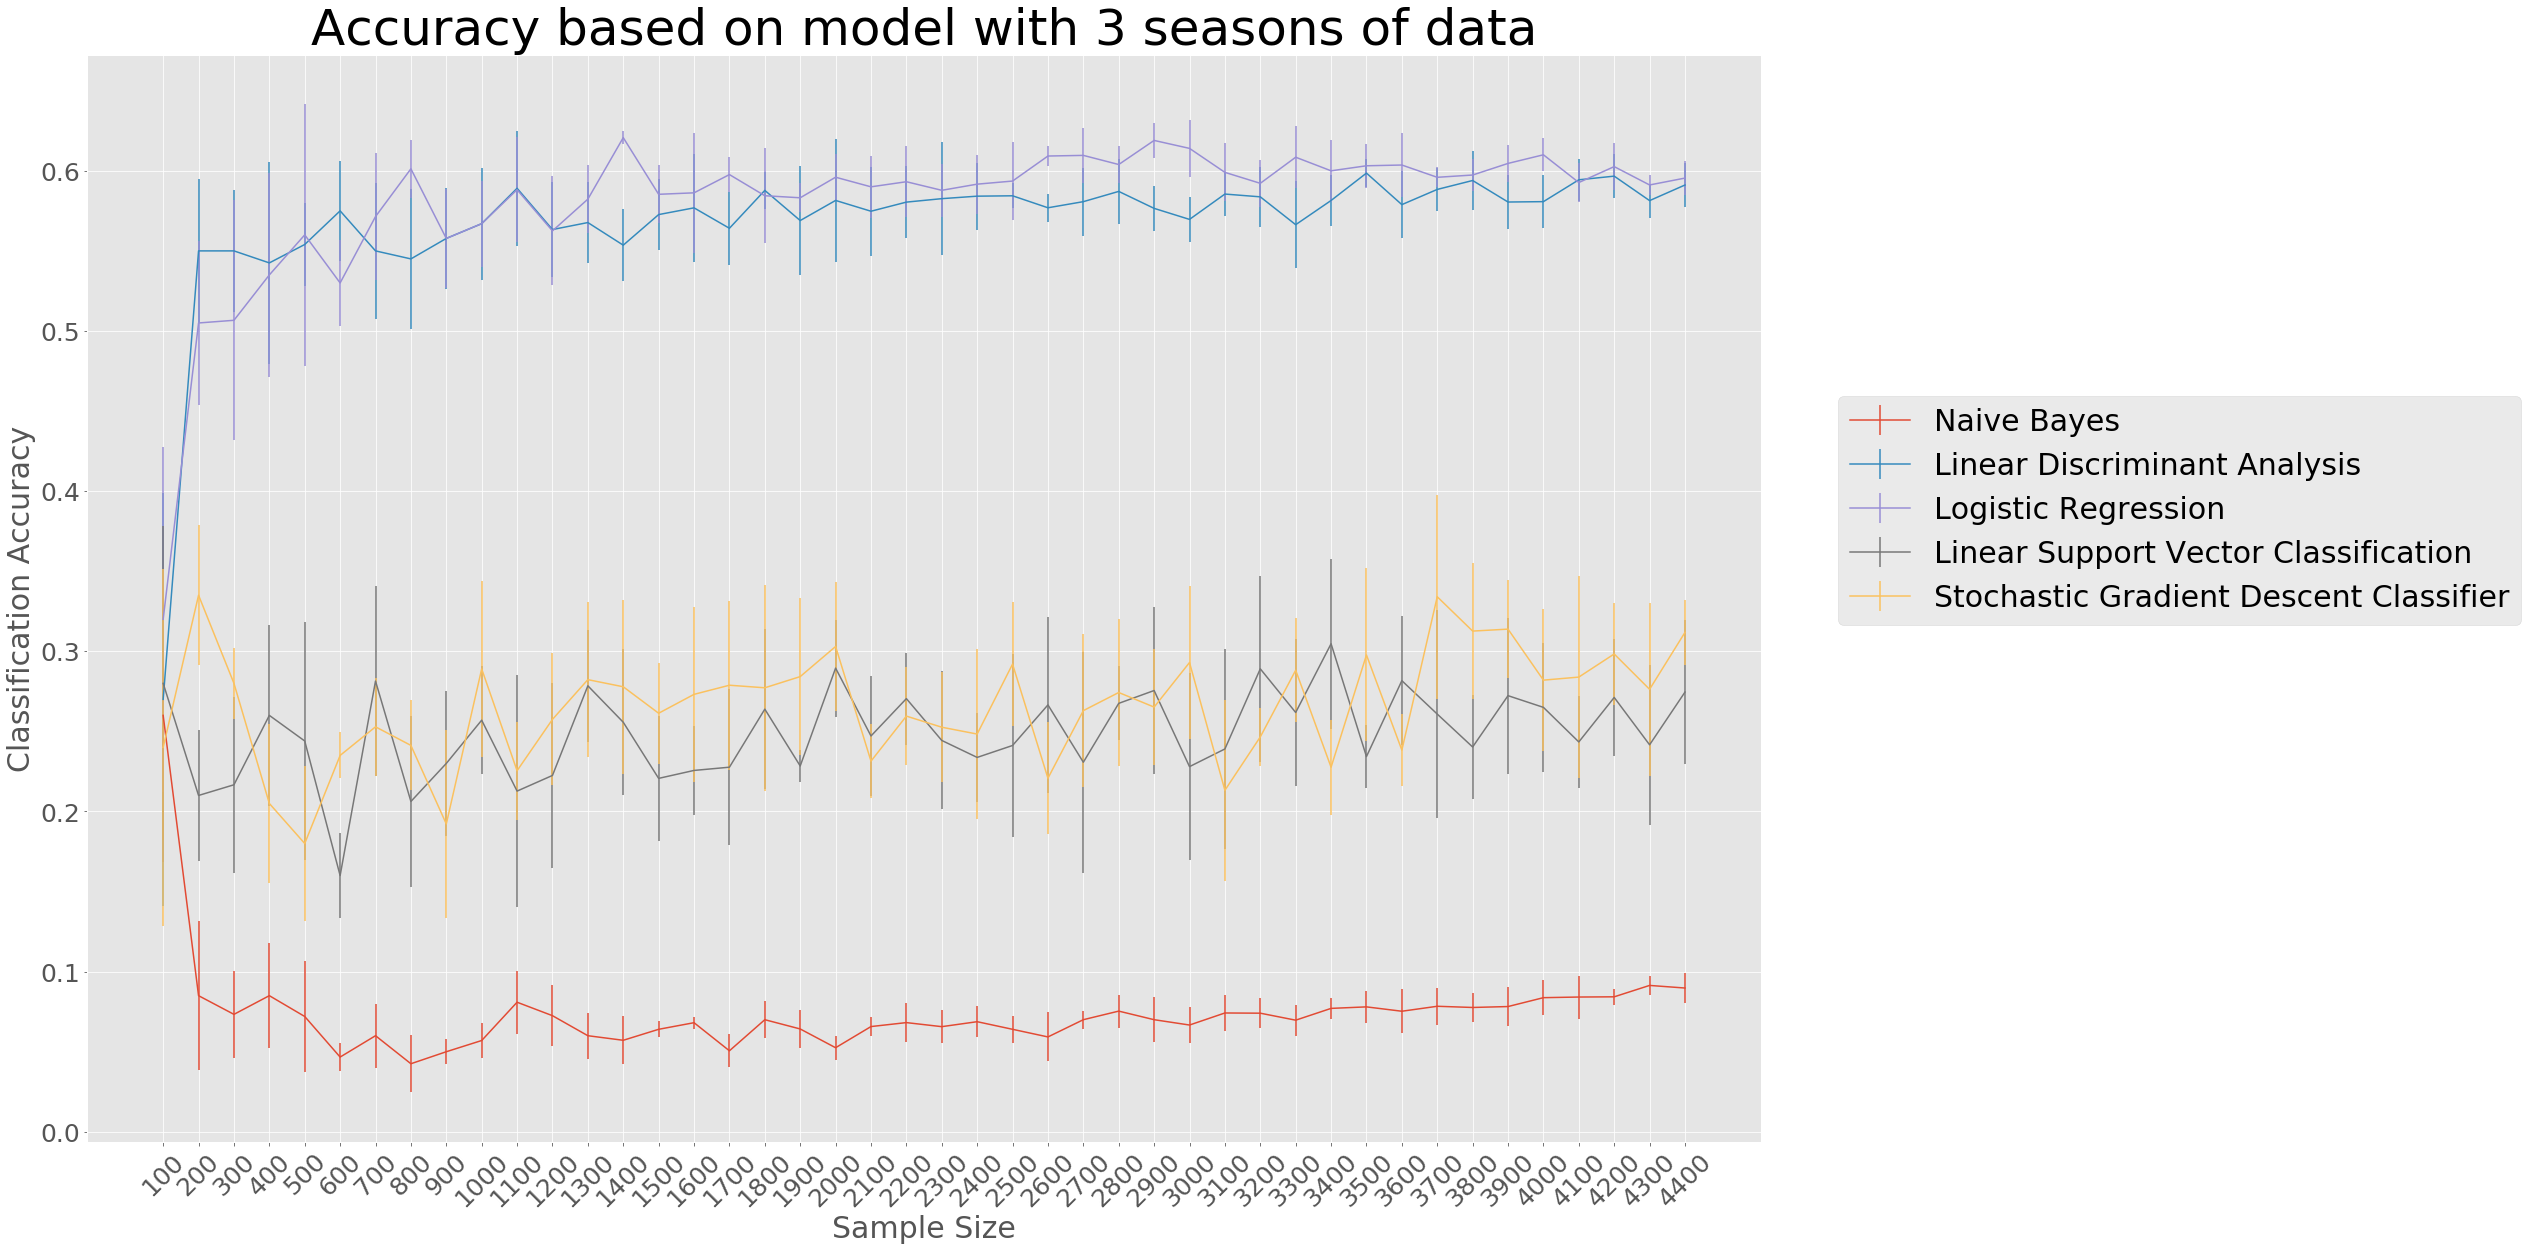

In [821]:
samples = 1500

globaldata= initialize_globaldf()

data = make_data("Bachelor_2018.csv", 22, "thebkoof", samples)
data1 = make_data("Bachelor_2019.csv", 23, "CassieRandolph", samples)
data4 = make_data("Bachelorette_2019.csv", 15, "WyattJed", samples)

graph_data(4500, "overall3", "Accuracy based on model with 3 seasons of data")


### Sample size (n) versus Accuracy for 4 Seasons

In [ ]:
samples = 1500

globaldata = initialize_globaldf()

data = make_data("Bachelor_2018.csv", 22, "thebkoof", samples)
data1 = make_data("Bachelor_2019.csv", 23, "CassieRandolph", samples)
data3 = make_data("Bachelorette_2018.csv", 14, "Garrett", samples)
data4 = make_data("Bachelorette_2019.csv", 15, "WyattJed", samples)

graph_data(6000, "overall4", "Accuracy based on model with 4 seasons of data")